In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

Univaraite Analysis

In [5]:
df.drop(labels=["ID","default"],axis=1,inplace=True)

In [6]:
df_yes=df.loc[df["subscribed"]=="yes"]

In [7]:
df_no=df.loc[df["subscribed"]=="no"]

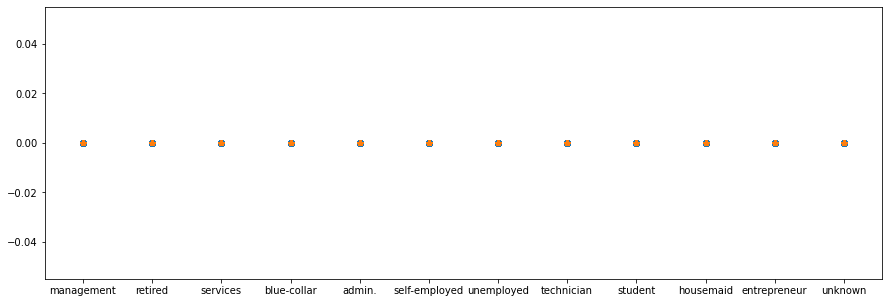

In [8]:
plt.figure(figsize=[15,5])

plt.plot(df_yes["job"],np.zeros_like(df_yes["job"]),'o')
plt.plot(df_no["job"],np.zeros_like(df_no["job"]),'*')
plt.show()

Bivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


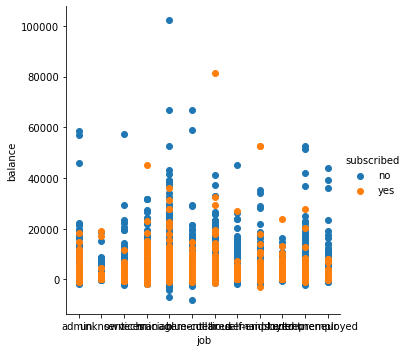

In [9]:

sns.FacetGrid(df,hue="subscribed",size=5).map(plt.scatter,"job","balance").add_legend();
plt.show()

In [17]:
df1=pd.get_dummies(data=df,columns=["subscribed","job","marital","education","housing","loan","contact","month","poutcome"],drop_first=True)
df1

,age,balance,day,duration,campaign,pdays,previous,subscribed_yes,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,56,1933,19,44,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,31,3,20,91,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,27,891,18,240,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,57,3287,22,867,1,84,3,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,31,119,4,380,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,0,12,116,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
31643,53,380,5,438,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
31644,32,312,7,37,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31645,57,225,15,22,7,337,12,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
x=df1.drop(labels=["subscribed_yes"],axis=1)
y=df1["subscribed_yes"]

In [25]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [26]:
x_train.shape

(22152, 41)

In [27]:
y_train.shape

(22152,)

In [28]:
x_test.shape

(9495, 41)

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred=clf.predict(x_test)

In [31]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [32]:
clf.score(x_test,y_test)

0.873407056345445

In [33]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.873407056345445

In [34]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
pred=reg.predict(x_test)
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [36]:
ac=accuracy_score(y_test,pred)
ac

0.8904686677198526